<a href="https://colab.research.google.com/github/donna6355/study_python/blob/master/mini_money/money_all_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pickle

# 저장된 피클 파일 불러오기
with open('money.pkl', 'rb') as file:
    df = pickle.load(file)

# 데이터 프레임 확인
df

,time,review,token,vector,cluster
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[나, 가계부, 지출, 년, 월, 생활비, 정산, 만, 원, 가계부, 인, 가구, ...","[0.30756757, 0.5918555, 0.461231, 0.046143718,...",0
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[0.27674928, 0.15712692, 0.13509633, 0.1298834...",0
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 하다, 경제, 흐름, 알다, 왜, 예금, 하다, 단지...","[0.13865133, 0.23854105, -0.1422634, -0.244948...",1
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 년, 금리, 변동, 카카오, ...","[0.2509269, 0.23787966, 0.4049208, -0.05299510...",2
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 미치다,...","[0.258239, 0.17201473, 0.14492722, -0.18530975...",0
...,...,...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 셋, 보다, 월, 주, 밸런스, 프렌즈, 토글, 리더, 스, 나, 많다, ...","[0.63227224, 0.9904623, -0.20603919, 0.2416802...",1
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,"[직장인, 생, 탤이, 생, 겨울방학, 끝, 동분서주, 바쁘다, 탤, 공주, 넘다,...","[0.27612135, 0.4148776, 0.9310572, -0.10018817...",1
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ...","[0.29272598, -0.0033324107, -0.10790638, 0.482...",2
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,"[외치다, 생, 하이루, 이번, 글, 사진, 레전드, 많다, 최대, 장수, 나, 생...","[0.45119035, 0.5115195, 0.41722584, -0.2367723...",4


In [5]:
import json

with open('SentiWord_info.json', encoding= "utf-8-sig", mode = 'r') as f:
  sent_dicts = json.load(f)
sd = {i['word']:int(i['polarity']) for i in sent_dicts}


In [4]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 51.8 MB/s eta 0:00:00


In [22]:
#필요한 패키지 임포트
import pandas as pd
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary
from tqdm import tqdm
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

In [24]:
#lda로 토픽 나누기 ** 이번엔 임의로 4개
#필요한 클러스터의 df, model, corpus 리턴
def get_cluster_w_topic(i):
  df_cluster = df.loc[df['cluster'] == i]
  all_documents = list(df_cluster['token'])
  dictionary = Dictionary(all_documents)
  corpus = [dictionary.doc2bow(i) for i in all_documents]

  ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 4, id2word=dictionary, random_state=42)
  align =[]
  for i in ldamodel.get_document_topics(corpus):
    label = []
    value = []
    for t,v in i:
      label.append(t)
      value.append(v)
    align.append(label[np.argmax(value)])

  df_cluster['topic'] = align

  return (df_cluster, corpus, ldamodel)


def min_max(dic):
  result_dic = {}
  value = list(dic.values())
  minn = np.min(value)
  maxx = np.max(value)

  for k,v in dic.items():
    result_dic[k] = float((v-minn)/(maxx-minn))
  return result_dic

def sentiment_score(sent_dicts, token_list):
  result = [sd[i] for i in token_list if i in sd]
  return 0 if len(result) == 0 else np.mean(result)


In [18]:
def get_sents(df):
  df['sentiment'] = df['token'].apply(lambda x: sentiment_score(sd,x))

  action_sents = {}
  for i in df['topic'].unique():
    action_sents[int(i)] = float(np.mean(df.loc[df['topic'] == i]['sentiment']))

  normalized_action_sents = min_max(action_sents)
  print('sentiment', normalized_action_sents)
  return normalized_action_sents

In [19]:
def get_imps(ldamodel, corpus):
  prob = []
  for i in ldamodel.get_document_topics(corpus):
    temp = {i:0 for i in range(4)}
    for k,v in i:
      temp[k] = float(v)
    prob.append(list(temp.values()))

  value = np.array(prob).mean(axis=0)
  action_imp = {}
  for i in range(len(prob[0])):
    action_imp[i] = float(value[i])

  normalized_action_imp = min_max(action_imp)
  print('importance',normalized_action_imp)
  return normalized_action_imp

In [20]:
def get_opp(normalized_action_sents,normalized_action_imp):
  opportunity_score = {}
  for i in range(4):
    sat = normalized_action_sents[i]
    imp = normalized_action_imp[i]

    opportunity_score[i] = imp + float(np.max([imp-sat,0]))

  print('opportunity',opportunity_score)
  return opportunity_score

In [31]:
all_res = []
for i in df['cluster'].unique():
  df_cluster, corpus, ldamodel = get_cluster_w_topic(i)
  sent = get_sents(df_cluster)
  imp = get_imps(ldamodel,corpus)
  opp = get_opp(sent, imp)
  all_res.append((int(i),sent,imp,opp))

sentiment {2: 1.0, 0: 0.028714690459810094, 1: 0.0, 3: 0.9078007017024401}


importance {0: 1.0, 1: 0.25047322596062027, 2: 0.4532688316630781, 3: 0.0}
opportunity {0: 1.9712853095401899, 1: 0.5009464519212405, 2: 0.4532688316630781, 3: 0.0}


sentiment {3: 0.0, 0: 1.0, 1: 0.7009066602831933, 2: 0.47233940878186603}
importance {0: 0.0, 1: 0.3177195982403985, 2: 0.03515655261685295, 3: 1.0}
opportunity {0: 0.0, 1: 0.3177195982403985, 2: 0.03515655261685295, 3: 2.0}


sentiment {2: 0.0, 0: 0.3428805081701503, 1: 0.27072594929390437, 3: 1.0}
importance {0: 0.06582732928566165, 1: 1.0, 2: 0.315396448462324, 3: 0.0}
opportunity {0: 0.06582732928566165, 1: 1.7292740507060955, 2: 0.630792896924648, 3: 0.0}


sentiment {1: 0.0, 3: 0.01712084584379847, 0: 0.42679906468689677, 2: 1.0}
importance {0: 0.5354581288537518, 1: 1.0, 2: 0.0, 3: 0.7924179778911747}
opportunity {0: 0.6441171930206068, 1: 2.0, 2: 0.0, 3: 1.567715109938551}


sentiment {3: 0.0, 1: 0.11350105285571148, 0: 0.2932719565260509, 2: 1.0}
importance {0: 0.09319260617306889, 1: 0.5580996326147294, 2: 0.0, 3: 1.0}
opportunity {0: 0.09319260617306889, 1: 1.0026982123737473, 2: 0.0, 3: 2.0}


sentiment {0: 0.3073457169816868, 2: 0.2128540197465227, 1: 1.0, 3: 0.0}
importance {0: 0.0, 1: 0.03108613743271244, 2: 1.0, 3: 0.10628696048947703}
opportunity {0: 0.0, 1: 0.03108613743271244, 2: 1.7871459802534773, 3: 0.21257392097895406}
sentiment {1: 1.0, 3: 0.0, 2: 0.9280739670855913, 0: 0.4022100452985157}
importance {0: 0.0, 1: 1.0, 2: 0.4051760084189387, 3: 0.43891443775731803}
opportunity {0: 0.0, 1: 1.0, 2: 0.4051760084189387, 3: 0.8778288755146361}


In [32]:
all_res

[(0,
  {2: 1.0, 0: 0.028714690459810094, 1: 0.0, 3: 0.9078007017024401},
  {0: 1.0, 1: 0.25047322596062027, 2: 0.4532688316630781, 3: 0.0},
  {0: 1.9712853095401899,
   1: 0.5009464519212405,
   2: 0.4532688316630781,
   3: 0.0}),
 (1,
  {3: 0.0, 0: 1.0, 1: 0.7009066602831933, 2: 0.47233940878186603},
  {0: 0.0, 1: 0.3177195982403985, 2: 0.03515655261685295, 3: 1.0},
  {0: 0.0, 1: 0.3177195982403985, 2: 0.03515655261685295, 3: 2.0}),
 (2,
  {2: 0.0, 0: 0.3428805081701503, 1: 0.27072594929390437, 3: 1.0},
  {0: 0.06582732928566165, 1: 1.0, 2: 0.315396448462324, 3: 0.0},
  {0: 0.06582732928566165,
   1: 1.7292740507060955,
   2: 0.630792896924648,
   3: 0.0}),
 (4,
  {1: 0.0, 3: 0.01712084584379847, 0: 0.42679906468689677, 2: 1.0},
  {0: 0.5354581288537518, 1: 1.0, 2: 0.0, 3: 0.7924179778911747},
  {0: 0.6441171930206068, 1: 2.0, 2: 0.0, 3: 1.567715109938551}),
 (3,
  {3: 0.0, 1: 0.11350105285571148, 0: 0.2932719565260509, 2: 1.0},
  {0: 0.09319260617306889, 1: 0.5580996326147294, 2: 0.0

In [39]:
sents_df = pd.DataFrame(columns = ['action','satisfaction', 'importance','opportunity'])
for cluster in all_res:
  idx = cluster[0]
  sents = cluster[1]
  imp = cluster[2]
  opp = cluster[3]
  for i in range(4):
    sents_df.loc[len(sents_df)] = [f'cluster{idx}action{i}',sents[i],imp[i],opp[i]]

sents_df

,action,satisfaction,importance,opportunity
0,cluster0action0,0.028715,1.000000,1.971285
1,cluster0action1,0.000000,0.250473,0.500946
2,cluster0action2,1.000000,0.453269,0.453269
3,cluster0action3,0.907801,0.000000,0.000000
4,cluster1action0,1.000000,0.000000,0.000000
5,cluster1action1,0.700907,0.317720,0.317720
6,cluster1action2,0.472339,0.035157,0.035157
7,cluster1action3,0.000000,1.000000,2.000000
8,cluster2action0,0.342881,0.065827,0.065827
9,cluster2action1,0.270726,1.000000,1.729274


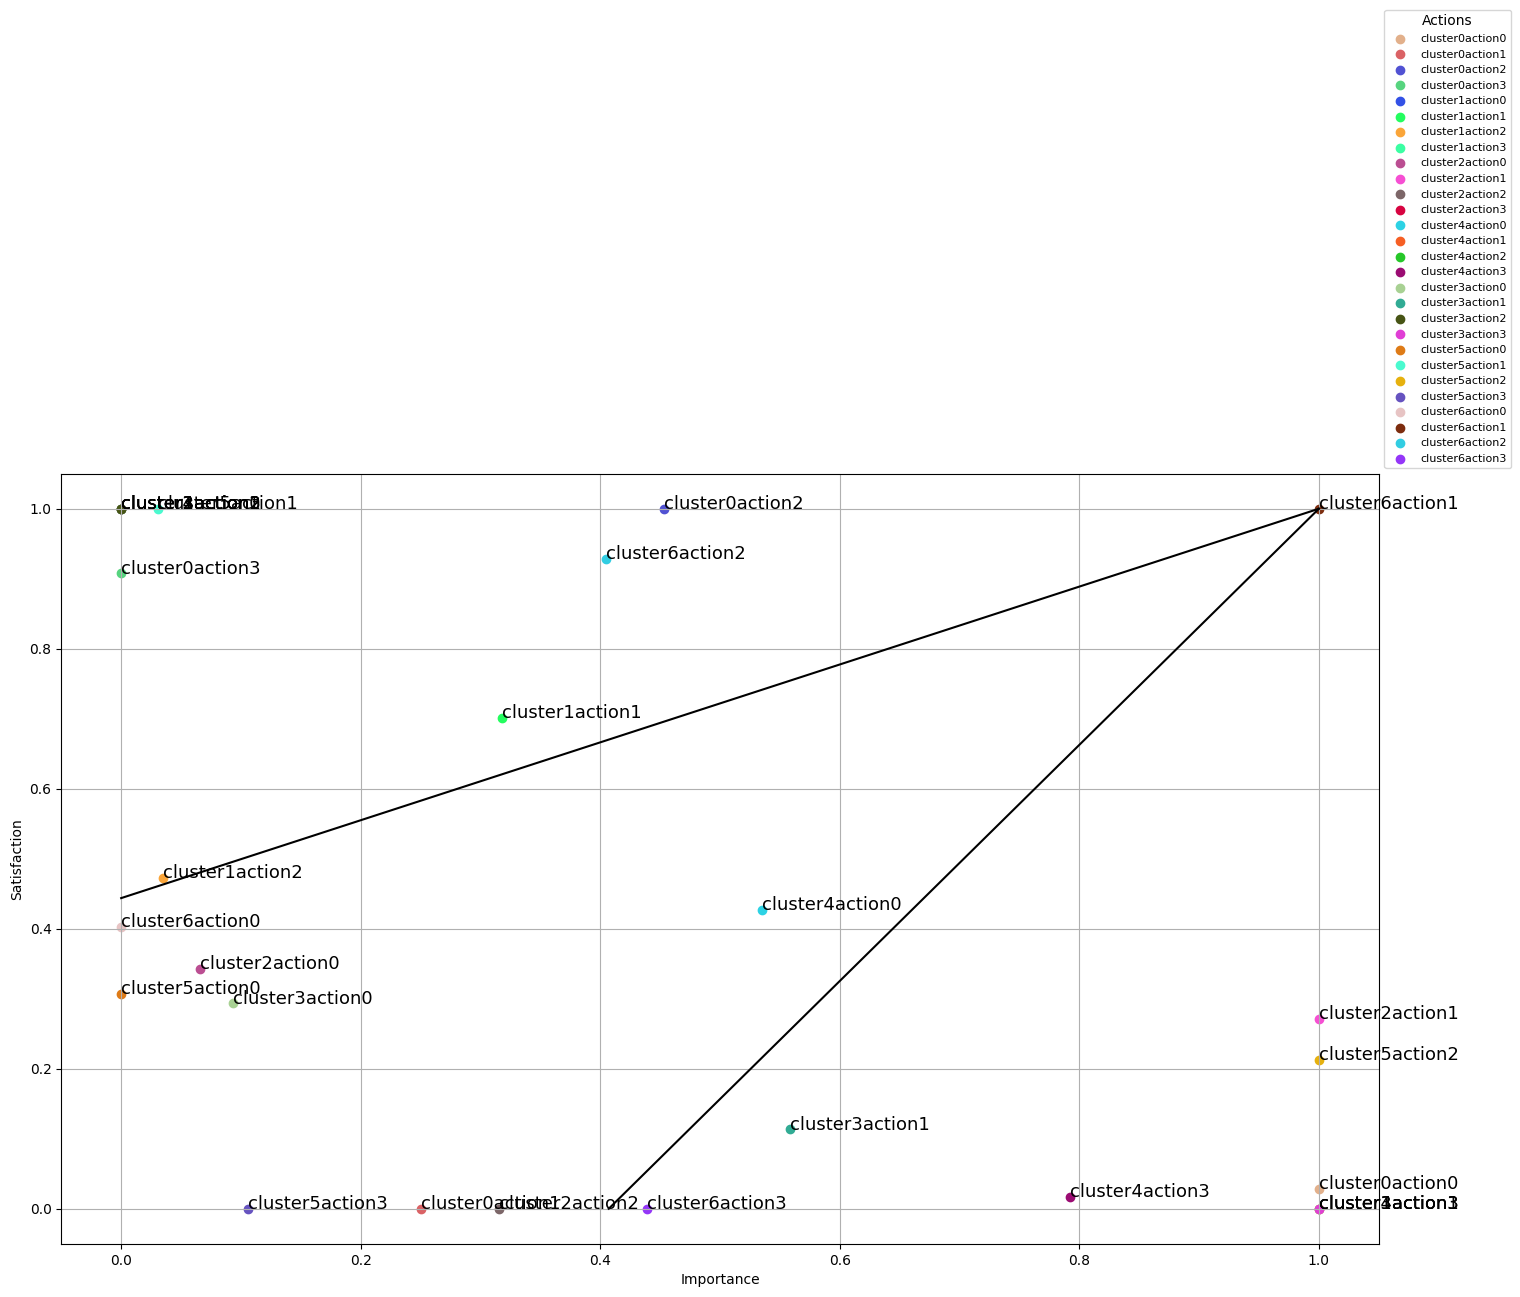

In [41]:
actions = sents_df['action']
colors = np.random.rand(len(actions),3) #rgb내에서 리스트 길이만큼 랜덤 색깔 선택
imp = sents_df['importance']
sat = sents_df['satisfaction']

plt.figure(figsize=(17,10))

for i, action in enumerate(actions):
  plt.scatter(imp[i],sat[i],c = [colors[i]],label= action)

plt.legend(title='Actions', fontsize = 8, title_fontsize = 10, loc='best',bbox_to_anchor = (1,1))
plt.xlabel('Importance')
plt.ylabel('Satisfaction')

#만족도 기준선
x_data = [0,1]
y_data = [sat.mean(),1]
plt.plot(x_data, y_data, 'k-')

#중요도 기준선
x_data = [imp.mean(),1]
y_data = [0,1]
plt.plot(x_data, y_data, 'k-')

#legend for each point
texts = []
for i, action in enumerate(actions):
  texts.append(plt.text(imp[i], sat[i], action, fontsize = 13))

plt.grid(True)
plt.savefig('Opportunity area.png', dpi=300, bbox_inches='tight')